<a href="https://colab.research.google.com/github/TahminaAnondi/migration_ML/blob/main/Migration_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries.

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn import svm # it is a supervised machine learning algorithm used for classification and regression tasks.
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor #It's based on the idea of constructing multiple decision trees during training and combining their predictions to improve accuracy and reduce overfitting.
import plotly.express as px

Load the Data

In [118]:
migration = pd.read_csv('migration_nz.csv')
migration.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [119]:
continents_to_exclude = ['Antarctica', 'Asia', 'Europe', 'North America', 'Antarctica','South America','Oceania','All countries','Not stated']

In [120]:
migration_filtered = migration[~migration['Country'].isin(continents_to_exclude)]

In [121]:
# Replacing 'Total All Citizenships' to 'Dual Citizenship'
migration_filtered.loc[migration['Citizenship'] == 'Total All Citizenships', 'Citizenship'] = 'Dual Citizenship'


In [122]:
migration_filtered.to_csv('filtered_migration_data.csv', index=False)

In [123]:
filtered_migration = pd.read_csv('filtered_migration_data.csv')

In [124]:
print(filtered_migration)

        Measure         Country          Citizenship  Year   Value
0      Arrivals  American Samoa  New Zealand Citizen  1979    17.0
1      Arrivals  American Samoa   Australian Citizen  1979     4.0
2      Arrivals  American Samoa     Dual Citizenship  1979    30.0
3      Arrivals       Australia  New Zealand Citizen  1979  8224.0
4      Arrivals       Australia   Australian Citizen  1979  4092.0
...         ...             ...                  ...   ...     ...
84469       Net          Zambia   Australian Citizen  2016     0.0
84470       Net          Zambia     Dual Citizenship  2016    19.0
84471       Net        Zimbabwe  New Zealand Citizen  2016     4.0
84472       Net        Zimbabwe   Australian Citizen  2016     2.0
84473       Net        Zimbabwe     Dual Citizenship  2016    63.0

[84474 rows x 5 columns]


Show information

In [125]:
filtered_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84474 entries, 0 to 84473
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      84474 non-null  object 
 1   Country      84474 non-null  object 
 2   Citizenship  84474 non-null  object 
 3   Year         84474 non-null  int64  
 4   Value        84402 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.2+ MB


Counting the number of missing values in each column of the "migration" DataFrame. The result will be a Series where the index is the column names, and the values are the counts of missing values in each column.

In [126]:
filtered_migration.isna().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64

This line of code is filling missing values in the "Value" column of the DataFrame named "migration" with the median of the "Value" column. The fillna method is used to replace missing (NaN) values with a specified value, and inplace=True means that the changes are made directly to the original DataFrame without the need to create a new one.

In [127]:
filtered_migration["Value"].fillna(filtered_migration["Value"].median(),inplace=True)
filtered_migration.isna().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
dtype: int64

This will be an array containing all the unique values found in the "Measure" column of the "migration" DataFrame. This is useful for understanding the different categories or types of measures present in that specific column of your dataset.

In [128]:
filtered_migration['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

After executing these lines, the "Measure" column will be modified, and the values "Arrivals" will be replaced with 0, "Departures" with 1, and "Net" with 2. This kind of transformation is often done to convert categorical variables into a format that can be used in numerical computations or machine learning models where numerical representations are more appropriate.

In [129]:
filtered_migration['Measure'].replace("Arrivals",0,inplace=True)
filtered_migration['Measure'].replace("Departures",1,inplace=True)
filtered_migration['Measure'].replace("Net",2,inplace=True)

Show all country in the dataset

In [130]:
filtered_migration['Country'].unique()

array(['American Samoa', 'Australia', 'Cocos Islands', 'Cook Islands',
       'Christmas Island', 'Fiji', 'Micronesia', 'Guam', 'Kiribati',
       'Marshall Islands', 'Northern Mariana Islands', 'New Caledonia',
       'Norfolk Island', 'Nauru', 'Niue', 'New Zealand',
       'French Polynesia', 'Papua New Guinea', 'Pitcairn Island', 'Palau',
       'Solomon Islands', 'French Southern Territories', 'Tokelau',
       'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna', 'Samoa',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Brunei Darussalam', 'Bhutan', 'China', 'Georgia', 'Hong Kong',
       'Indonesia', 'India', 'Japan', 'Kyrgyzstan', 'Cambodia',
       'North Korea', 'South Korea', 'Kazakhstan', 'Laos', 'Sri Lanka',
       'Myanmar', 'Mongolia', 'Macau', 'Maldives', 'Malaysia', 'Nepal',
       'Philippines', 'Pakistan', 'Singapore', 'Thailand', 'Tajikistan',
       'Timor-Leste', 'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietnam',
       'Andorra', 'Albania', 'Austr

In [131]:
unique_countries_count = filtered_migration['Country'].nunique()
print(f"Number of unique countries: {unique_countries_count}")


Number of unique countries: 247


We will need a command line or terminal, here we telling pip to download and install the Plotly library. Plotly is a Python graphing library that is used for creating interactive plots and visualizations. It can be handy for creating a variety of charts, graphs, and dashboards in Python.

In [132]:
!pip install plotly

Define a list of measures

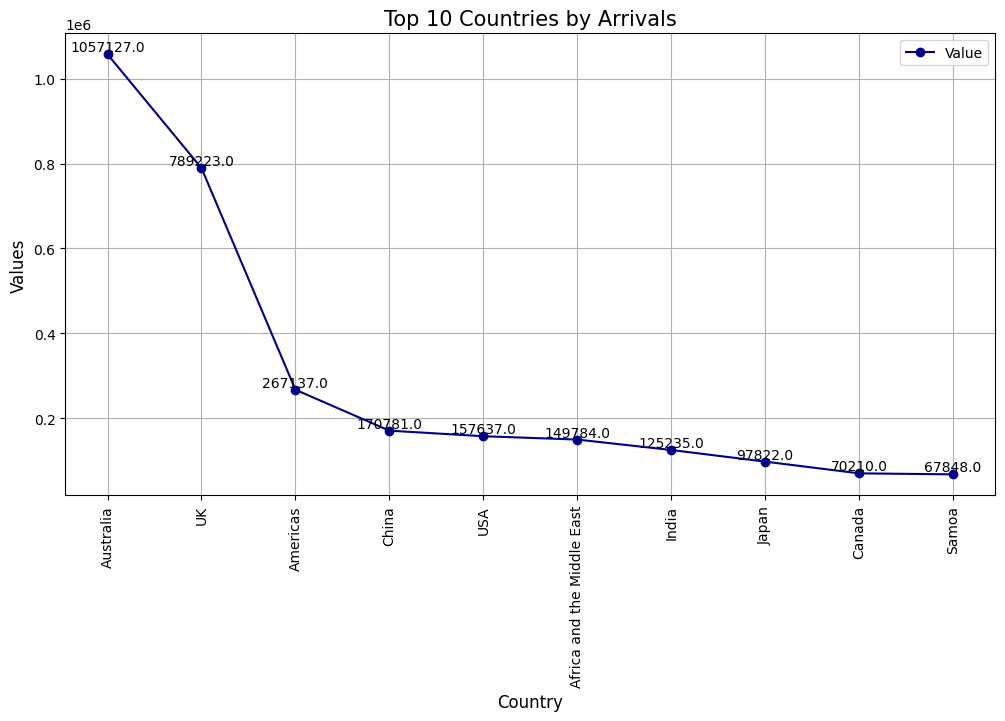

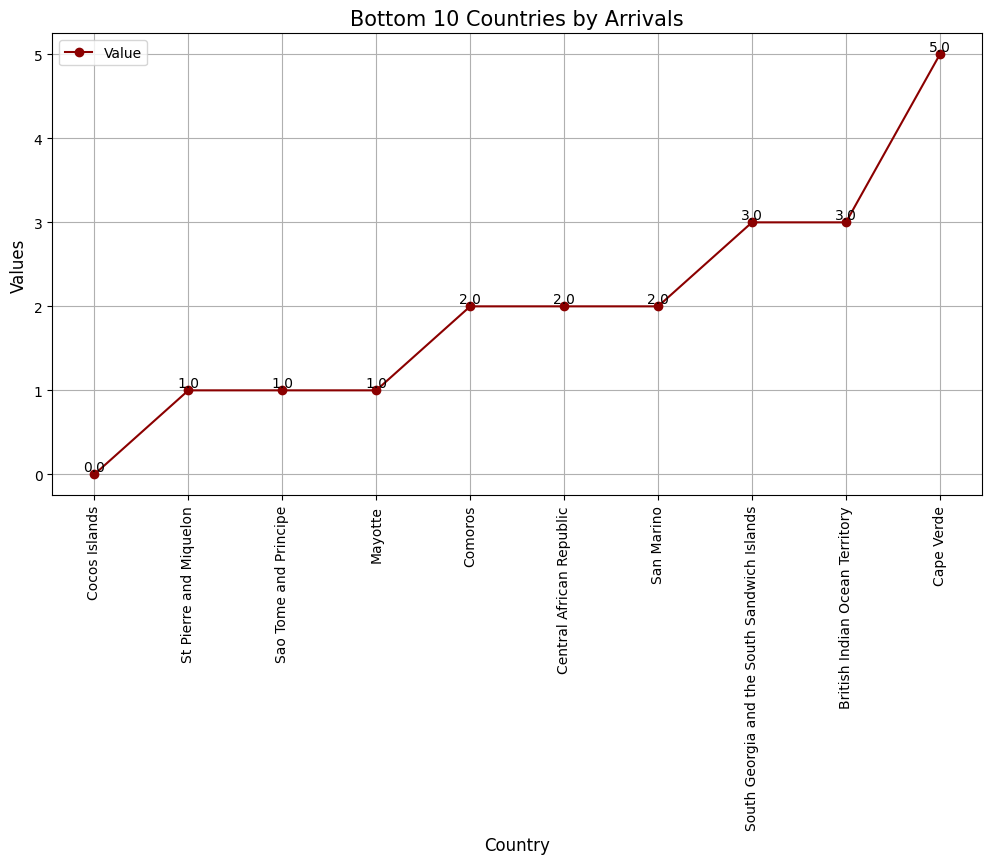

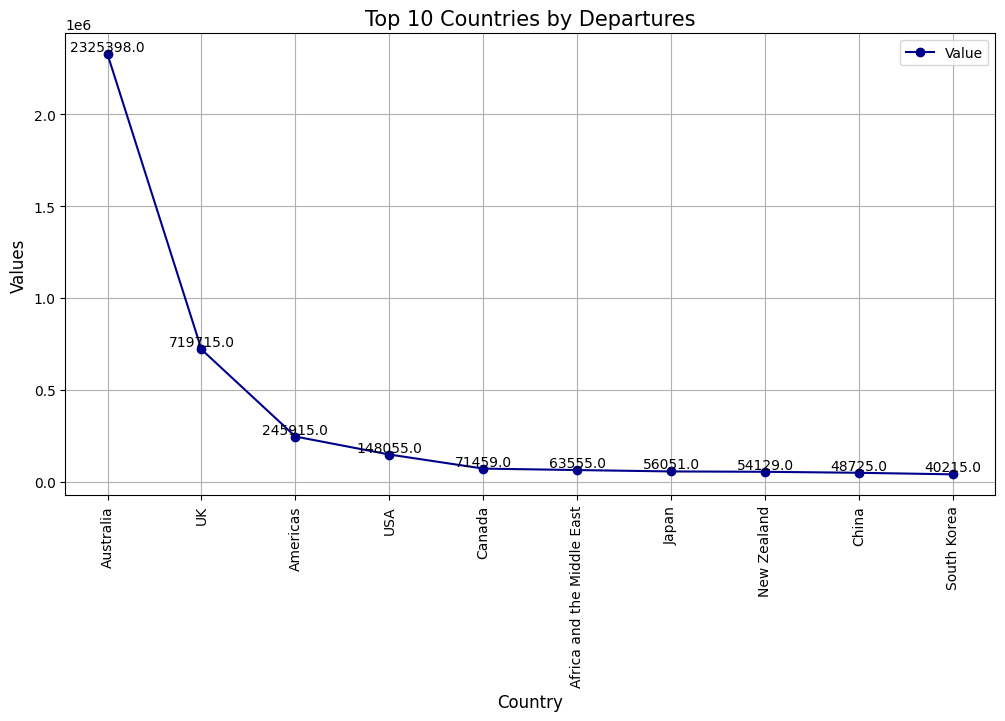

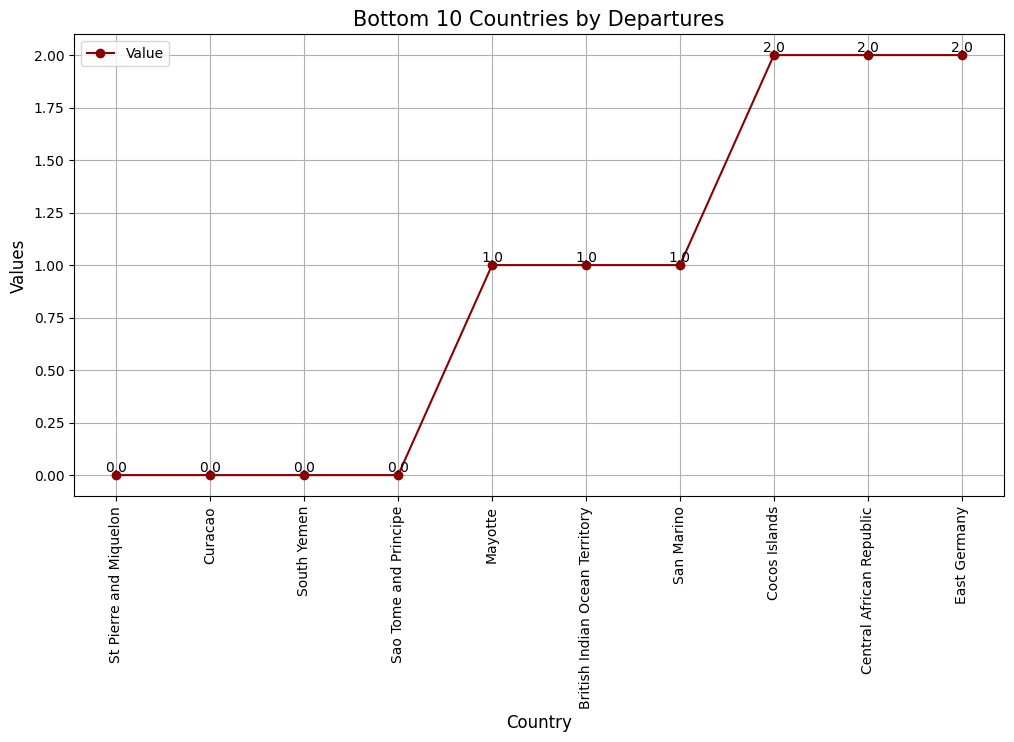

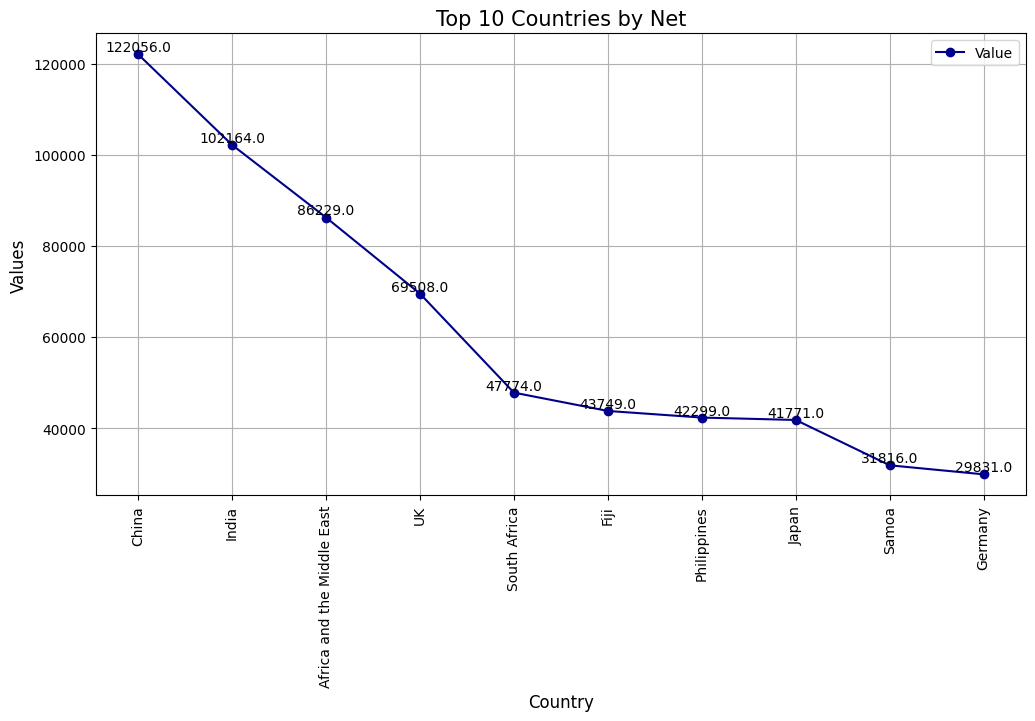

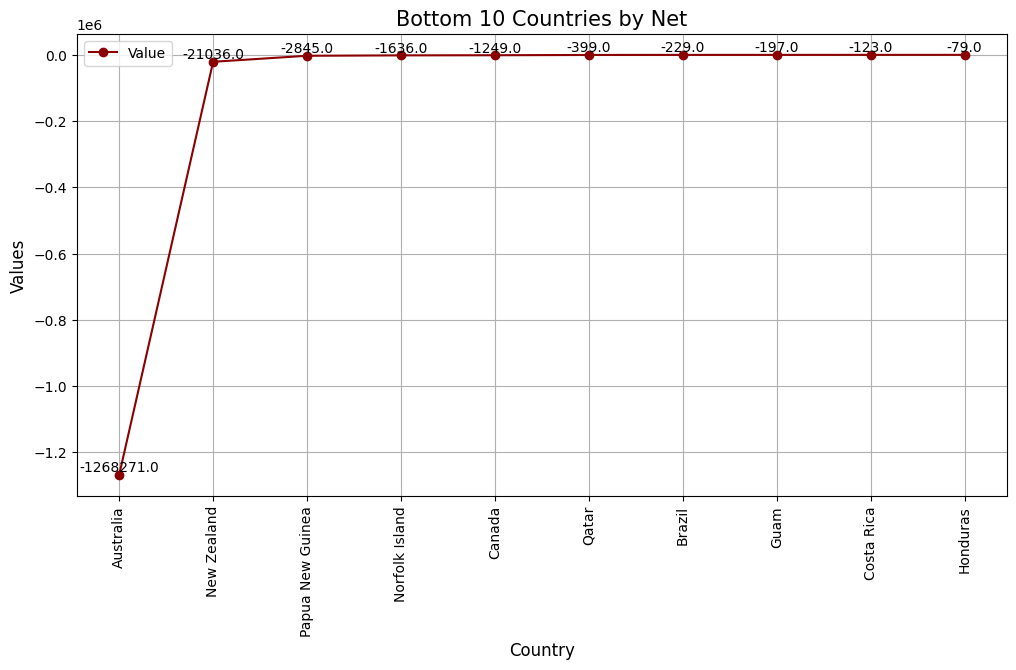

In [133]:
measures = [0, 1, 2]

for measure in measures:
    measure_data = filtered_migration[filtered_migration['Measure'] == measure]

    if len(measure_data) > 1:
        if measure == 0:
            title = 'Arrivals'
        elif measure == 1:
            title = 'Departures'
        else:
            title = 'Net'

        # Group the data by 'Year' and calculate the sum of 'Value' for each year
        grouped = measure_data.groupby(['Year']).aggregate({'Value': 'sum'}).reset_index()

        # Create an interactive line chart using Plotly Express for total values
        fig_total = px.line(
            grouped,
            x='Year',
            y='Value',
            title=f'Total {title} by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            hover_name='Value',  # Display 'Value' on hover
            markers=True,
        )

        fig_total.show()

        # Now let's add the top and bottom countries for each measure
        grouped_country = measure_data.groupby(['Year', 'Country']).aggregate({'Value': 'sum'}).reset_index()
        sorted_data = grouped_country.sort_values(['Year', 'Value'], ascending=[True, False])

        # Get the top and bottom country for each year
        top_country = sorted_data.groupby('Year').head(1)
        bottom_country = sorted_data.groupby('Year').tail(1)

        # Create interactive line charts for top and bottom countries using Plotly Express
        fig_top_country = px.line(
            top_country,
            x='Year',
            y='Value',
            title=f'All countries {title} by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            text='Country',  # Display 'Country' on hover
            markers=True,
        )

        fig_bottom_country = px.line(
            bottom_country,
            x='Year',
            y='Value',
            title=f'Bottom Country {title} by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            text='Country',  # Display 'Country' on hover
            markers=True,
        )

        fig_top_country.show()
        fig_bottom_country.show()

        # Now, create a line chart for the top and bottom 10 countries
        # Group the data by 'Country' and calculate the sum of 'Value' for each country
        grouped = measure_data.groupby(['Country']).aggregate({'Value': 'sum'}).reset_index()

        # Sort the data by 'Value' in descending order to find the top 10 and bottom 10 countries
        top_10_countries = grouped.sort_values(by='Value', ascending=False).head(10)
        bottom_10_countries = grouped.sort_values(by='Value', ascending=True).head(10)

        # Create a line chart for the top 10 countries
        plt.figure(figsize=(12, 6))
        plt.plot(top_10_countries['Country'], top_10_countries['Value'], color='darkblue', marker='o', label='Value')

        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Values', fontsize=12)

        plt.title(f'Top 10 Countries by {title}', fontsize=15)

        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.grid()
        plt.legend()

        # Add value on hover
        for i, txt in enumerate(top_10_countries['Value']):
            plt.annotate(txt, (top_10_countries['Country'].iloc[i], txt), fontsize=10, ha='center', va='bottom')

        plt.show()

        # Create a line chart for the bottom 10 countries
        plt.figure(figsize=(12, 6))
        plt.plot(bottom_10_countries['Country'], bottom_10_countries['Value'], color='darkred', marker='o', label='Value')

        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Values', fontsize=12)

        plt.title(f'Bottom 10 Countries by {title}', fontsize=15)

        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.grid()
        plt.legend()

        # Add value on hover
        for i, txt in enumerate(bottom_10_countries['Value']):
            plt.annotate(txt, (bottom_10_countries['Country'].iloc[i], txt), fontsize=10, ha='center', va='bottom')

        plt.show()
    else:
        print(f"Insufficient data for {measure}. Skipping line chart.")

Replace all countries with 'USA' in the 'Country' column.

In [134]:
#filtered_migration['Country'].replace('USA', 0, inplace=True)
# Factorize the 'Country' column
#filtered_migration['Country'] = pd.factorize(filtered_migration['Country'])[0]

In [135]:
# Factorize the 'Country' and 'Citizenship' columns for numerical representation
filtered_migration['Country'] = pd.factorize(filtered_migration.Country)[0]


In [136]:
filtered_migration['Citizenship'].unique()

array(['New Zealand Citizen', 'Australian Citizen', 'Dual Citizenship'],
      dtype=object)

In [137]:
filtered_migration['Citizenship'].replace('New Zealand Citizen',0,inplace=True)
filtered_migration['Citizenship'].replace('Australian Citizen',1,inplace=True)
filtered_migration['Citizenship'].replace('Dual Citizenship',2,inplace=True)

In [138]:
x_data = filtered_migration[['Country','Citizenship','Measure','Year']]
y_data = filtered_migration['Value']

In [139]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.30, random_state=9)


#**Random Forest Regression**

Create model object

In [140]:
model_rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data.
predictions_rf = model_rf.predict(x_test_data)

In [141]:
model_rf.score(x_test_data, y_test_data)

0.7375137112169945

#**Linear Regression**


In [142]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(x_training_data, y_training_data)

# Make predictions on the test data
predictions_lr = model_lr.predict(x_test_data)


In [143]:
model_lr.score(x_test_data, y_test_data)

0.008374613349059534

In [144]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test_data, predictions_lr)

print(f"Mean Squared Error: {mse_lr}")


Mean Squared Error: 1635075.0067045437


#**Multiple Linear Regression**

In [145]:
from sklearn.metrics import r2_score
# Create a linear regression model
model_mlr = LinearRegression()

# Train the model on the training data
model_mlr.fit(x_training_data, y_training_data)

# Make predictions on the test data
predictions_mlr = model_mlr.predict(x_test_data)

# Evaluate the model
score_mlr = r2_score(y_test_data, predictions_mlr)

print(f"Multiple Linear Regression Score: {score_mlr}")

Multiple Linear Regression Score: 0.008374613349059534


In [146]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse_mlr = mean_squared_error(y_test_data, predictions_mlr)

print(f"Mean Squared Error: {mse_mlr}")


Mean Squared Error: 1635075.0067045437


Visualize number of migrations by year in a line graph.

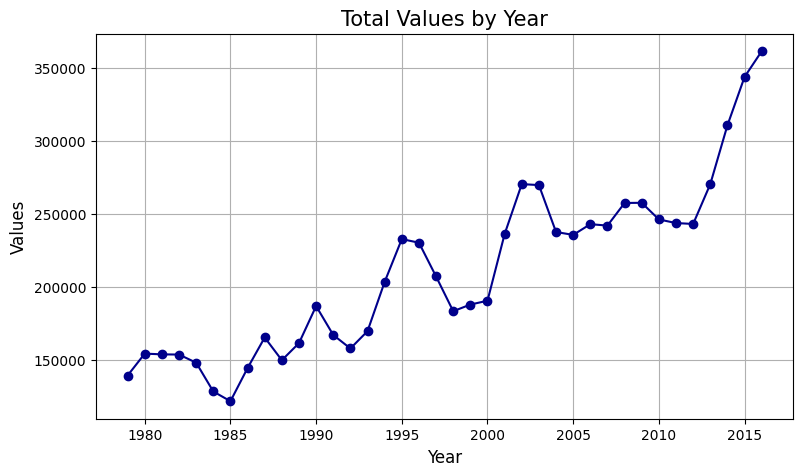

In [147]:
grouped = filtered_migration.groupby(['Year']).aggregate({'Value' : 'sum'}).reset_index()
grouped = grouped.astype(int)
plt.figure(figsize=(9,5))
plt.plot(grouped['Year'], grouped['Value'], color='darkblue',  marker='o')
plt.ticklabel_format(style='plain')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Total Values by Year', fontsize=15)
plt.grid()
plt.show()

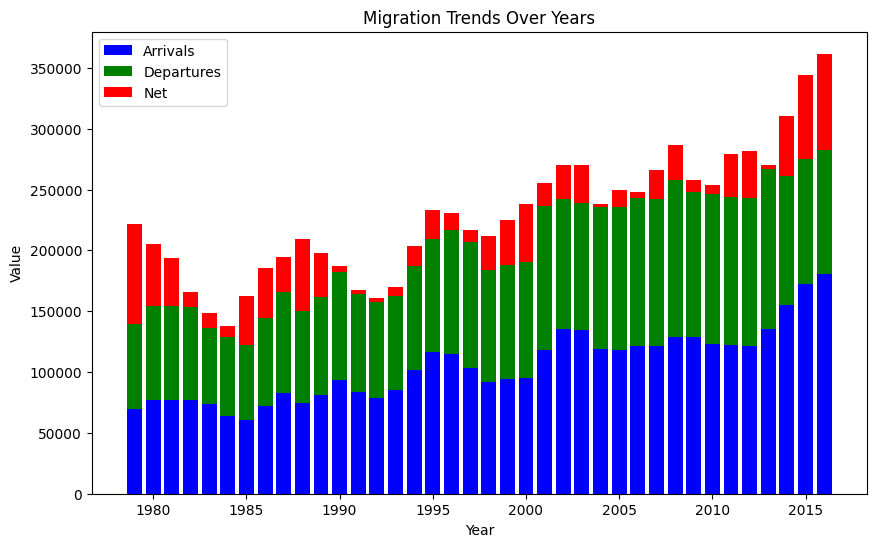

In [148]:
# Filter data for different values (e.g., Arrivals, Departures, Net)
arrivals_data = filtered_migration[filtered_migration['Measure'] == 0]  # Assuming 0 represents Arrivals
departures_data = filtered_migration[filtered_migration['Measure'] == 1]  # Assuming 1 represents Departures
net_data = filtered_migration[filtered_migration['Measure'] == 2]  # Assuming 2 represents Net

# Group data by year and sum the values for each measure
arrivals_grouped = arrivals_data.groupby('Year')['Value'].sum()
departures_grouped = departures_data.groupby('Year')['Value'].sum()
net_grouped = net_data.groupby('Year')['Value'].sum()

# Create a stacked bar chart to visualize migration trends over the years
plt.figure(figsize=(10, 6))
plt.bar(arrivals_grouped.index, arrivals_grouped, label='Arrivals', color='blue')
plt.bar(departures_grouped.index, departures_grouped, label='Departures', color='green', bottom=arrivals_grouped)
plt.bar(net_grouped.index, net_grouped, label='Net', color='red', bottom=arrivals_grouped + departures_grouped)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Migration Trends Over Years')
plt.legend()
plt.show()

Load the data

In [149]:
migration =  pd.read_csv('filtered_migration_data.csv')
# List of countries to keep
countries_to_keep = ['USA', 'India','Australia','New Zealand']

# Filter out rows where the 'Country' column is not in the list of countries to keep
migration_filtered_for_UIBBN = migration[migration['Country'].isin(countries_to_keep)]
print(migration_filtered_for_UIBBN)


        Measure      Country          Citizenship  Year    Value
3      Arrivals    Australia  New Zealand Citizen  1979   8224.0
4      Arrivals    Australia   Australian Citizen  1979   4092.0
5      Arrivals    Australia     Dual Citizenship  1979  13037.0
45     Arrivals  New Zealand  New Zealand Citizen  1979   1604.0
46     Arrivals  New Zealand   Australian Citizen  1979    246.0
...         ...          ...                  ...   ...      ...
83849       Net        India   Australian Citizen  2016      3.0
83850       Net        India     Dual Citizenship  2016   8899.0
84228       Net          USA  New Zealand Citizen  2016   -214.0
84229       Net          USA   Australian Citizen  2016      0.0
84230       Net          USA     Dual Citizenship  2016   1286.0

[1368 rows x 5 columns]


In [150]:
#information about the data columns.
migration_filtered_for_UIBBN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 3 to 84230
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      1368 non-null   object 
 1   Country      1368 non-null   object 
 2   Citizenship  1368 non-null   object 
 3   Year         1368 non-null   int64  
 4   Value        1368 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 64.1+ KB


In [151]:
migration_filtered_for_UIBBN.isna().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
dtype: int64

In [152]:
migration_filtered_for_UIBBN['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [153]:
migration_filtered_for_UIBBN['Measure'].replace("Arrivals", 0, inplace=True)
migration_filtered_for_UIBBN['Measure'].replace("Departures", 1, inplace=True)
migration_filtered_for_UIBBN['Measure'].replace("Net", 2, inplace=True)

<ipython-input-153-1021d5b96637>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-153-1021d5b96637>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-153-1021d5b96637>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
migration_filtered_for_UIBBN['Country'].unique()

array(['Australia', 'New Zealand', 'India', 'USA'], dtype=object)

In [155]:
measures = [0, 1, 2]

for measure in measures:
    measure_data = migration_filtered_for_UIBBN[migration_filtered_for_UIBBN['Measure'] == measure]

    if len(measure_data) > 1:
        if measure == 0:
            title = 'Arrivals'
        elif measure == 1:
            title = 'Departures'
        else:
            title = 'Net'

        # Group the data by 'Year' and calculate the sum of 'Value' for each year
        grouped = measure_data.groupby(['Year']).aggregate({'Value': 'sum'}).reset_index()

        # Create an interactive line chart using Plotly Express for total values
        fig_total = px.line(
            grouped,
            x='Year',
            y='Value',
            title=f'Total {title} of USA,India, Australia and New Zealand by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            hover_name='Value',  # Display 'Value' on hover
            markers=True,
        )

        fig_total.show()

        # Now let's add the top and bottom countries for each measure
        grouped_country = measure_data.groupby(['Year', 'Country']).aggregate({'Value': 'sum'}).reset_index()
        sorted_data = grouped_country.sort_values(['Year', 'Value'], ascending=[True, False])

        # Get the top and bottom country for each year
        top_country = sorted_data.groupby('Year').head(1)
        bottom_country = sorted_data.groupby('Year').tail(1)

        # Create interactive line charts for top and bottom countries using Plotly Express
        fig_top_country = px.line(
            top_country,
            x='Year',
            y='Value',
            title=f'Top Country {title} among USA,India,Australia and New Zealand by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            text='Country',  # Display 'Country' on hover
            markers=True,
        )

        fig_bottom_country = px.line(
            bottom_country,
            x='Year',
            y='Value',
            title=f'Bottom Country {title} among USA,India,Australia and New Zealand by Year',
            labels={'Year': 'Year', 'Value': 'Values'},
            text='Country',  # Display 'Country' on hover
            markers=True,
        )

        fig_top_country.show()
        fig_bottom_country.show()
    else:
        print(f"Insufficient data for {measure}. Skipping line chart.")

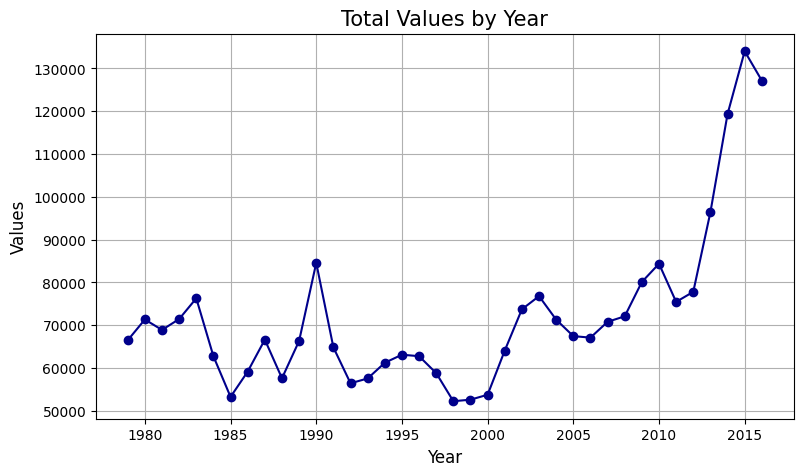

In [156]:
grouped = migration_filtered_for_UIBBN.groupby(['Year']).aggregate({'Value' : 'sum'}).reset_index()
grouped = grouped.astype(int)
plt.figure(figsize=(9,5))
plt.plot(grouped['Year'], grouped['Value'], color='darkblue',  marker='o')
plt.ticklabel_format(style='plain')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Total Values by Year', fontsize=15)
plt.grid()
plt.show()

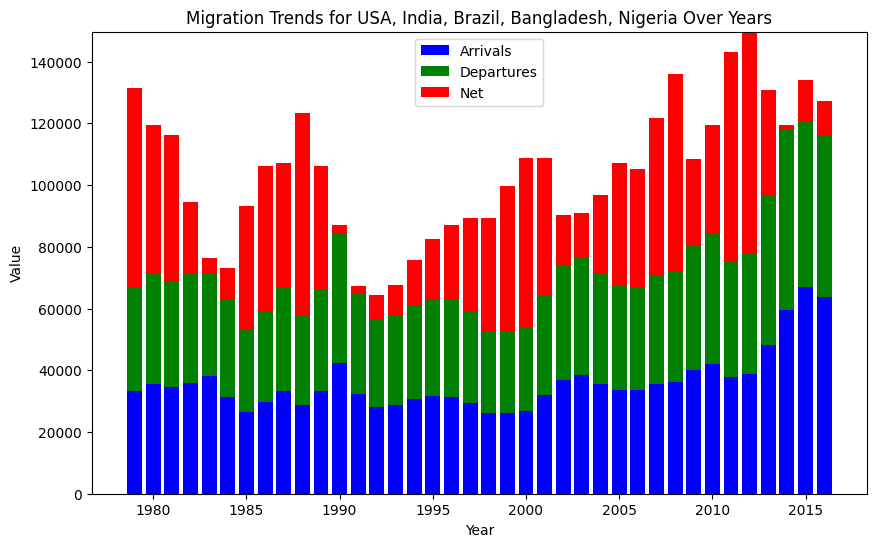

In [157]:
# Filter data for different values (e.g., Arrivals, Departures, Net)
arrivals_data = migration_filtered_for_UIBBN[migration_filtered_for_UIBBN['Measure'] == 0]  # Assuming 0 represents Arrivals
departures_data = migration_filtered_for_UIBBN[migration_filtered_for_UIBBN['Measure'] == 1]  # Assuming 1 represents Departures
net_data = migration_filtered_for_UIBBN[migration_filtered_for_UIBBN['Measure'] == 2]  # Assuming 2 represents Net

# Group data by year and sum the values for each measure
arrivals_grouped = arrivals_data.groupby('Year')['Value'].sum()
departures_grouped = departures_data.groupby('Year')['Value'].sum()
net_grouped = net_data.groupby('Year')['Value'].sum()

# Create a stacked bar chart to visualize migration trends over the years
plt.figure(figsize=(10, 6))
plt.bar(arrivals_grouped.index, arrivals_grouped, label='Arrivals', color='blue')
plt.bar(departures_grouped.index, departures_grouped, label='Departures', color='green', bottom=arrivals_grouped)
plt.bar(net_grouped.index, net_grouped, label='Net', color='red', bottom=arrivals_grouped + departures_grouped)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Migration Trends for USA, India, Brazil, Bangladesh, Nigeria Over Years')
plt.legend()
plt.show()